# Modeling and evaluation

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [14]:
# Add iPython magic to print charts
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]

In this case, our problem requires a regression. In this first iteration we will use a linear algorithm.

In [15]:
x = pd.read_csv(filepath_or_buffer='datasets/x.csv')
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.107364,2.126754,108.542088,143.0,3.713060e+07,7.1,4.819001e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [16]:
# Get the target vector
y = x['gross']
y.head()

0    7.605058e+08
1    4.819001e+07
2    3.094042e+08
3    2.000742e+08
4    4.481306e+08
Name: gross, dtype: float64

In [17]:
# Remove the target vector column from x
x = x.drop(labels=['gross'], axis=1)
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,2002.107364,2.126754,108.542088,143.0,3.713060e+07,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


In [18]:
# Create the split data. 60% train and 40% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

print("x_train =", len(x_train))
print("x_test  =", len(x_test))
print("y_train =", len(y_train))
print("y_test  =", len(y_test))

x_train = 2436
x_test  = 1625
y_train = 2436
y_test  = 1625


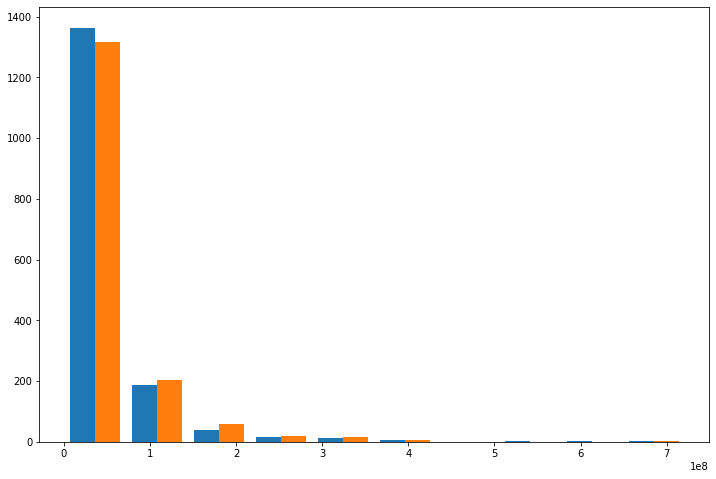

In [19]:
# Use Lasso regression
model = Lasso()
model.fit(X=x_train, y=y_train)

# Get predictions and compare with y_test vector
predicted = model.predict(X=x_test)
plt.hist(x=[predicted, y_test]);

In [20]:
# Evaluate your model with score R2
model.score(X=x_test, y=y_test)

0.7528105279370942

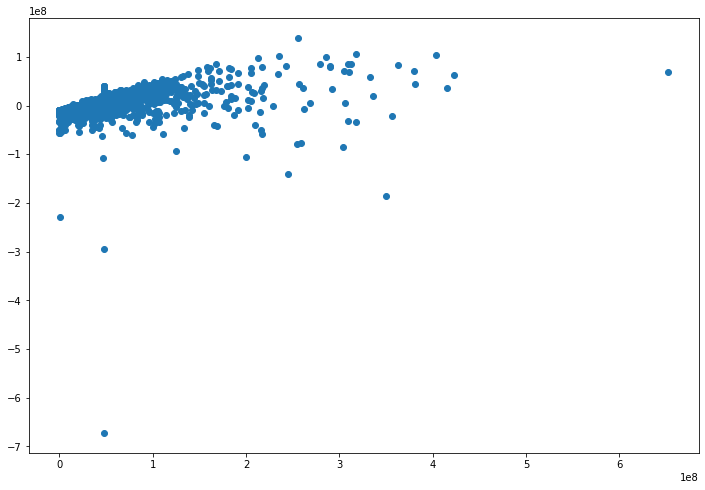

In [21]:
# Check how far the predicted values ​​are from the test values
residuals = y_test - predicted
plt.scatter(x=y_test, y=residuals)

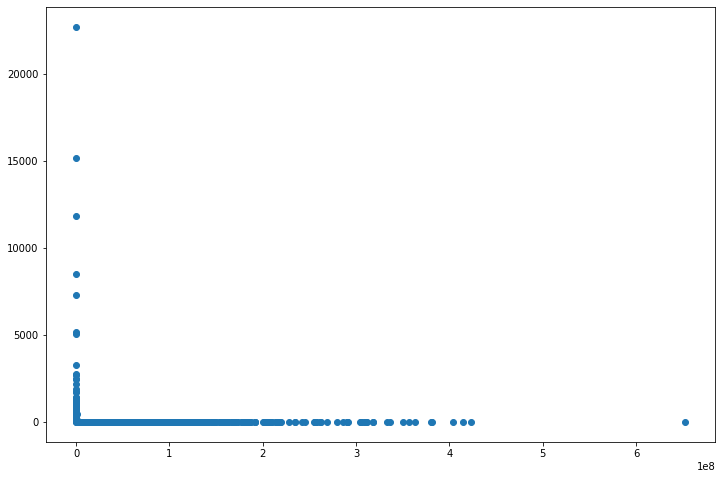

In [22]:
# Now check in percentages
absolute_residuals = np.abs(residuals) / y_test
plt.scatter(x=y_test, y=absolute_residuals)

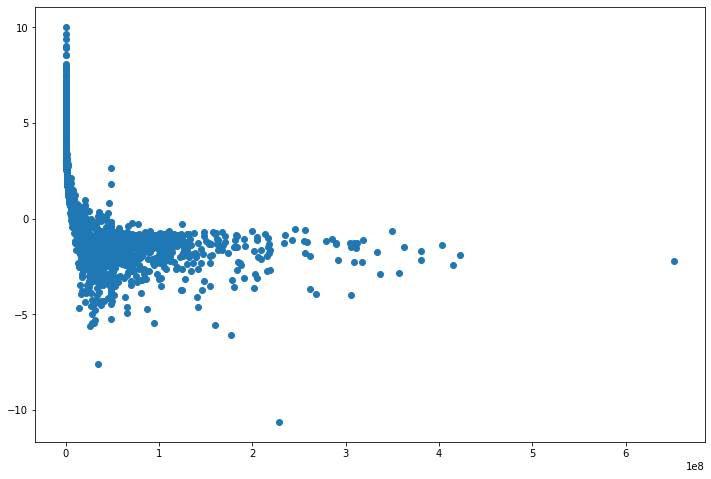

In [23]:
# Now in a logarithmic scale
log_residuals = np.log(absolute_residuals)
plt.scatter(x=y_test, y=log_residuals)

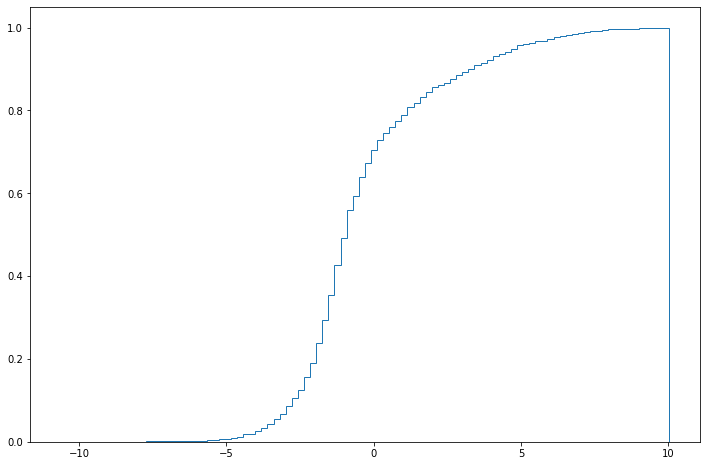

In [24]:
plt.hist(x=log_residuals, bins=100, density=True, histtype='step', cumulative=True);